<a href="https://colab.research.google.com/github/mittalh/Stack-Overflow/blob/master/IMDB_Movie_Review_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow 
print(tensorflow.__version__)



2.0.0


In [0]:
import tensorflow_datasets as tfds 

In [6]:
imdb,info= tfds.load("imdb_reviews",with_info=True,as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
train,test= imdb['train'],imdb['test']

In [0]:
train_sentences=[]
train_label=[]
test_sentences=[]
test_label=[]
for s,l in train:
    train_sentences.append(str(s.numpy()))
    train_label.append(l.numpy())
for s,l in test:
    test_sentences.append(str(s.numpy()))
    test_label.append(l.numpy())    

In [0]:
import numpy as np
train_label=np.array(train_label)
test_label=np.array(test_label)

In [10]:
train_sentences[1]

'b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i\'m sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It\'s a must see and i hope u share my interests"'

In [11]:
print("No of Training Examples: "+str(len(train_sentences)))
print("No of Testing Examples: "+str(len(test_sentences)))

No of Training Examples: 25000
No of Testing Examples: 25000


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Hyperparameters
vocab_size=1000
embedding_dim=16
max_length=120
trunc_type='post'
oov_tok='<00v>'

In [0]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
train_sequences= tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,maxlen=max_length,truncating=trunc_type)
test_sequences= tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=max_length,truncating=trunc_type)

In [14]:
print("train_size: "+str(train_padded.shape))
print("test_size: "+str(test_padded.shape))

train_size: (25000, 120)
test_size: (25000, 120)


In [15]:
import tensorflow as tf
import keras
model=tf.keras.Sequential([ tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=(max_length)),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(6,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                ])

Using TensorFlow backend.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_padded,train_label,epochs=5,validation_data=(test_padded,test_label),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 - 4s - loss: 0.6115 - accuracy: 0.6908 - val_loss: 0.4870 - val_accuracy: 0.7850
Epoch 2/5
25000/25000 - 3s - loss: 0.4377 - accuracy: 0.8015 - val_loss: 0.4208 - val_accuracy: 0.8040
Epoch 3/5
25000/25000 - 3s - loss: 0.4051 - accuracy: 0.8172 - val_loss: 0.4114 - val_accuracy: 0.8067
Epoch 4/5
25000/25000 - 3s - loss: 0.3959 - accuracy: 0.8222 - val_loss: 0.4087 - val_accuracy: 0.8088
Epoch 5/5
25000/25000 - 3s - loss: 0.3908 - accuracy: 0.8250 - val_loss: 0.4074 - val_accuracy: 0.8092


Text(0.5, 1.0, 'Loss Curve')

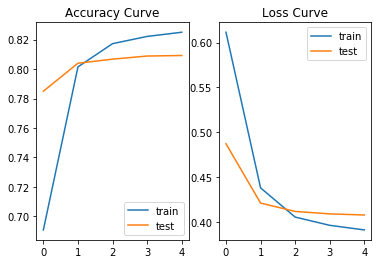

In [18]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.title("Accuracy Curve")
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.title("Loss Curve")

In [0]:
y_pred_train_prob=[]
y_pred_test_prob=[]
size=range(25000)
for i in size:
    y_pred_train_prob.append(model.predict(train_padded[i].reshape(1,120)))



In [0]:
for i in size:
    y_pred_test_prob.append(model.predict(test_padded[i].reshape(1,120)))    